# Lab | Handling Data Imbalance in Classification Models

For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using `files_for_lab/Customer-Churn.csv` file.

### Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.


### Libraries

In [43]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import seaborn as sns

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import TomekLinks

import warnings
warnings.filterwarnings('ignore')

### Data import

In [2]:
churnData = pd.read_csv('Customer-Churn.csv')
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [3]:
churnData.shape

(7043, 16)

### Data info

In [4]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

### Changing column type

In [5]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [6]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

### Null values

In [7]:
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
churnData['TotalCharges'].mean()

2283.3004408418656

In [9]:
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(churnData['TotalCharges'].mean())

In [10]:
churnData.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### X-y-split

In [11]:
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = churnData['Churn']

### Train-test-split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling the data

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

### Logistic Regression model

In [15]:
def classification_model(X_train, y_train, X_test, y_test, w):
    classification = LogisticRegression(random_state=13, max_iter=500, class_weight=w) 
    classification.fit(X_train, y_train)
    
    score_class = classification.score(X_test, y_test)
    
    predictions = classification.predict(X_test)
    value_cnt_class = pd.Series(predictions).value_counts()
    
    print('The accuracy score is: ', score_class, '\n')
    print('The value counts of the model predictions are: ', '\n', value_cnt_class) 

In [16]:
def metrics_classification(X_train, y_train, X_test, y_test, w):
    
    classification = LogisticRegression(random_state=42, max_iter=500, class_weight=w) 
    classification.fit(X_train, y_train)
    
    predictions = classification.predict(X_test)
    
    #confusion matrix
    cf_matrix = confusion_matrix(y_test, predictions)
    group_names = ['True A', 'False A',
                   'False B', 'True B']

    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    print('Confusion matrix:')
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    
    
    #classification report
    metrics_class = metrics.classification_report(y_test, predictions)
    print('Classification report:', '\n')
    print(metrics_class)  

In [17]:
classification_model(X_train, y_train, X_test, y_test, w=None)

The accuracy score is:  0.8076650106458482 

The value counts of the model predictions are:  
 No     1153
Yes     256
dtype: int64


Confusion matrix:
Classification report: 

              precision    recall  f1-score   support

          No       0.83      0.93      0.88      1036
         Yes       0.70      0.48      0.57       373

    accuracy                           0.81      1409
   macro avg       0.77      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409



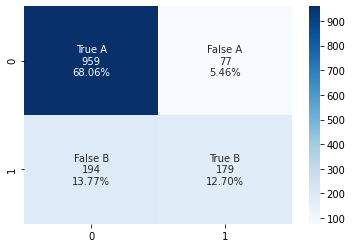

In [18]:
metrics_classification(X_train, y_train, X_test, y_test, w=None)

## Balancing imbalance of the data

### Upsampling

In [27]:
y_train = pd.DataFrame(y_train).reset_index()
y_train = y_train.drop('index', axis=1)
y_train

,Churn
0,No
1,No
2,Yes
3,Yes
4,No
...,...
5629,Yes
5630,No
5631,No
5632,Yes


In [28]:
data_up = pd.concat([X_train, y_train], axis=1)
data_up

,0,1,2,3,Churn
0,-0.465683,-0.437749,-0.000474,-0.422099,No
1,0.885537,-0.437749,1.074754,1.255366,No
2,-1.284605,-0.437749,-1.376499,-1.002985,Yes
3,-1.161766,-0.437749,0.177346,-0.908113,Yes
4,-1.325551,-0.437749,-0.098524,-0.003468,No
...,...,...,...,...,...
5629,-1.284605,-0.437749,1.001632,-0.971339,Yes
5630,-0.383791,-0.437749,0.872006,-0.041063,No
5631,-0.834198,-0.437749,-1.452945,-0.877993,No
5632,-0.834198,2.284413,1.149538,-0.482538,Yes


In [29]:
A = data_up[data_up['Churn'] == 'Yes'].sample(1153) 
B = data_up[data_up['Churn'] == 'No'].sample(1153, replace=True)


upsampled = pd.concat([A, B]).sample(frac=1) # .sample(frac=1) here is just to shuffle the dataframe
upsampled.shape

(2306, 5)

In [30]:
X_train_up = upsampled.drop(['Churn'], axis=1)
y_train_up = upsampled['Churn']

In [31]:
classification_model(X_train_up, y_train_up, X_test, y_test, w=None)

The accuracy score is:  0.7487579843860894 

The value counts of the model predictions are:  
 No     850
Yes    559
dtype: int64


Confusion matrix:
Classification report: 

              precision    recall  f1-score   support

          No       0.90      0.74      0.81      1036
         Yes       0.52      0.77      0.62       373

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



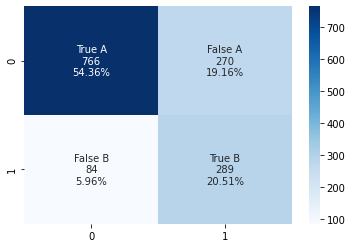

In [32]:
metrics_classification(X_train_up, y_train_up, X_test, y_test, w=None)

### Downsampling

In [33]:
data_down = pd.concat([X_train, y_train], axis=1)
data_down

,0,1,2,3,Churn
0,-0.465683,-0.437749,-0.000474,-0.422099,No
1,0.885537,-0.437749,1.074754,1.255366,No
2,-1.284605,-0.437749,-1.376499,-1.002985,Yes
3,-1.161766,-0.437749,0.177346,-0.908113,Yes
4,-1.325551,-0.437749,-0.098524,-0.003468,No
...,...,...,...,...,...
5629,-1.284605,-0.437749,1.001632,-0.971339,Yes
5630,-0.383791,-0.437749,0.872006,-0.041063,No
5631,-0.834198,-0.437749,-1.452945,-0.877993,No
5632,-0.834198,2.284413,1.149538,-0.482538,Yes


In [34]:
A = data_down[data_down['Churn'] == 'Yes'].sample(256) 
B = data_down[data_down['Churn'] == 'No'].sample(256, replace=True)


downsampled = pd.concat([A, B]).sample(frac=1) # .sample(frac=1) here is just to shuffle the dataframe
downsampled.shape

(512, 5)

In [35]:
X_train_down = downsampled.drop(['Churn'], axis=1)
y_train_down = downsampled['Churn']

In [36]:
classification_model(X_train_down, y_train_down, X_test, y_test, w=None)

The accuracy score is:  0.7480482611781405 

The value counts of the model predictions are:  
 No     859
Yes    550
dtype: int64


Confusion matrix:
Classification report: 

              precision    recall  f1-score   support

          No       0.90      0.74      0.81      1036
         Yes       0.52      0.76      0.62       373

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.75      0.76      1409



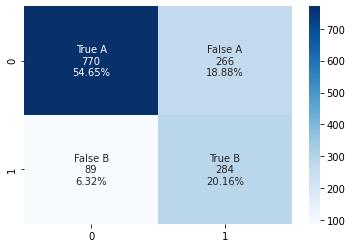

In [38]:
metrics_classification(X_train_down, y_train_down, X_test, y_test, w=None)

### SMOTE

In [39]:
X_train_sm = X_train.copy()
y_train_sm = y_train.copy()

In [40]:
smote = SMOTE()

X_train_sm, y_train_sm = smote.fit_resample(X_train_sm, y_train_sm)
y_train_sm.value_counts()

Churn
No       4138
Yes      4138
dtype: int64

In [41]:
classification_model(X_train_sm, y_train_sm, X_test, y_test, w=None)

The accuracy score is:  0.7452093683463449 

The value counts of the model predictions are:  
 No     853
Yes    556
dtype: int64


Confusion matrix:
Classification report: 

              precision    recall  f1-score   support

          No       0.90      0.74      0.81      1036
         Yes       0.51      0.76      0.61       373

    accuracy                           0.75      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.75      0.76      1409



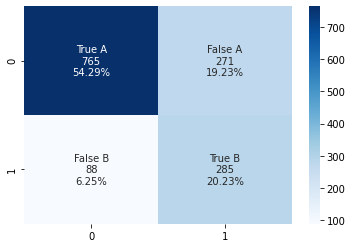

In [42]:
metrics_classification(X_train_sm, y_train_sm, X_test, y_test, w=None)

### Tomeklinks

In [44]:
X_train_tl = X_train.copy()
y_train_tl = y_train.copy()

In [46]:
tl = TomekLinks('majority')

X_train_tl, y_train_tl = tl.fit_resample(X_train_tl, y_train_tl)

In [47]:
classification_model(X_train_tl, y_train_tl, X_test, y_test, w=None)

The accuracy score is:  0.7899219304471257 

The value counts of the model predictions are:  
 No     1076
Yes     333
dtype: int64


Confusion matrix:
Classification report: 

              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1036
         Yes       0.62      0.55      0.58       373

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



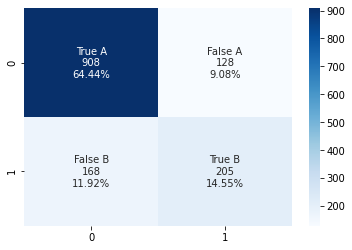

In [48]:
metrics_classification(X_train_tl, y_train_tl, X_test, y_test, w=None)